In [4]:
import pandas as pd
import reverse_geocode

%matplotlib inline
from ggplot import *
import pymysql
import warnings
warnings.filterwarnings('ignore')
pysqldf = lambda q: sqldf(q, globals())
from pandasql import *
import pymysql
from pandasql import sqldf 
import plotnine as p9
import matplotlib.pyplot as p

df = pd.read_csv("~/Downloads/Hyve Data Assessment/Cell_tower.csv") 
df1 = df[['lat','lng']]
df2=reverse_geocode.search(df1)
df3=pd.DataFrame.from_dict(df2)
df=pd.concat([df, df3], axis=1, ignore_index=False)
df.to_csv('~/Downloads/Hyve Data Assessment/reverse_geolocations.csv')
df.head()

,user_id,lat,lng,country_code,city,country
0,35539881,-34.063782,18.820499,ZA,Stellenbosch,South Africa
1,19603336,-29.191851,27.444849,ZA,Ladybrand,South Africa
2,40292465,-26.950027,28.100788,ZA,Deneysville,South Africa
3,26428370,-34.081173,23.065119,ZA,Knysna,South Africa
4,19829847,-28.773481,20.613968,ZA,Kakamas,South Africa


In [16]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(angle=90, 
                                                        )
                           )
df_customers_by_station_2017=pysqldf("""SELECT count(distinct user_id) Number_of_Customers 
        ,city
        FROM df 
        group by  2
        order by 1 desc
        limit 20;""")
df_customers_by_station_2017

,Number_of_Customers,city
0,295,Cape Town
1,271,Hermanus
2,226,Constantia
3,183,Randburg
4,180,Sunset Beach
5,160,Stellenbosch
6,160,George
7,141,Grabouw
8,130,Mossel Bay
9,120,Butha-Buthe


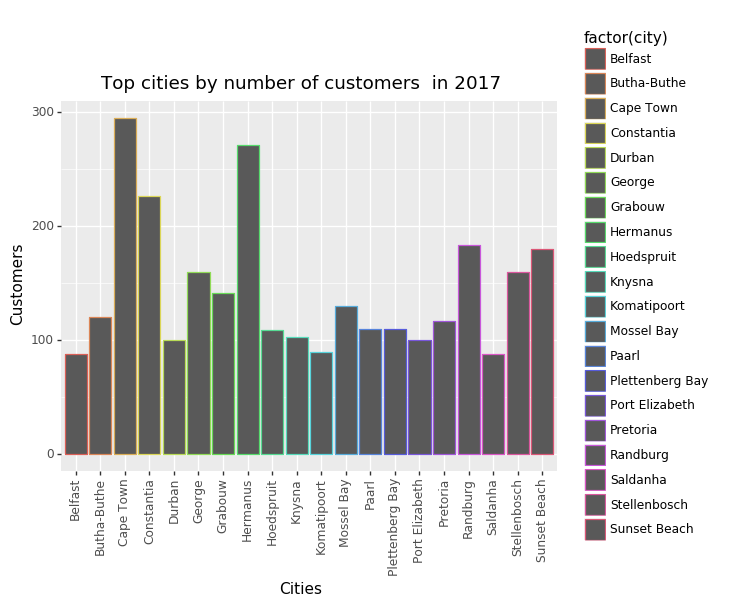

<ggplot: (300109837)>

In [20]:

(p9.ggplot(data=df_customers_by_station_2017,
           mapping=p9.aes(x='((factor(city)))',
                          y='Number_of_Customers',
                          color='factor(city)'
                         ))
    + p9.geom_bar(stat = "identity")+my_custom_theme+
  p9.ggtitle("Top cities by number of customers  in 2017") + p9.xlab("Cities") + p9.ylab("Customers")


)